I’d like to sum up the past two weeks of Data Science in Public posts to discuss what I did, and what we learned.  I’m interested in interdisciplinary science, because so much of science is done by interdisciplinary teams. Very few of the problems that we care about: fighting cancer, clean energy systems, ecological resilience and human well-being, have relevant discoveries that can be made by the idealized model of a lone specialist who is very knowledgeable at one type of thing. The National Science Foundation recognizes, and has been aiding in the transformation of science, in part with the IGERT/NRT grant series.  These awards are for about 3,000,000 dollars over five years, with most of the funding going towards graduate student stipends to encourage innovative models in STEM graduate education on high-priority interdisciplinary topics. There have been over 400 of these awards made since 1997, for something like $1.2 billion in total.

I think it’s important to know if this program is working.  The 2018 NRT funding solicitation states: “The program is dedicated to effective training of STEM graduate students in high priority interdisciplinary research areas, through the use of a comprehensive traineeship model that is innovative, evidence-based, and aligned with changing workforce and research needs.”  In an ideal world, we’d be able to embed trained ethnographers in every one of these grants, to track the development of students into scientists.  That’s not feasible, and we can’t go back to the earliest grants without a time machine, but one of the nice things about scientists is that they publish what they discover, those publications are indexed by databases like the Thomson Reuters - ISI Web of Knowledge, and we can use the richly structured information in publications to say something about the grants that produced them.

*In one sentence, can we use data science to show that the IGERT/NRT solicitation produced more interdisciplinary scholarship?*

This workbook will be a little more fragmentary than most, see the accompanying blog post for full details.

In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('5-scientometrics101-cites.csv')
data.head()

,alias,first_author,group,group_start,number_authors,sdi,times_cited,journal,pub_year,velocity,...,HISTORY OF SOCIAL SCIENCES,LITERATURE,LOGIC,LANGUAGE & LINGUISTICS,LITERARY THEORY & CRITICISM,LITERARY REVIEWS,FOLKLORE,CLASSICS,MUSIC,MEDIEVAL & RENAISSANCE STUDIES
0,T3015,False,E,2011,5,0.453791,9,MACROMOLECULES,2014,2.250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T1954,True,E,2011,6,0.578180,7,BIOMACROMOLECULES,2014,1.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,T1144,False,D,2010,4,0.288167,15,TEACH. SOCIOL.,2012,2.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,T2953,False,C,2009,6,0.204894,925,ADV. FUNCT. MATER.,2007,84.090909,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,T1635,True,A,2011,2,0.376589,4,J. APPL. RES. INTELLECT. DISABIL.,2017,4.000000,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


For the first step, we're going to train classifiers on the Web of Science categories that make up the back 240 columns of the dataset. We train a Logistic Regression model, a Support Vector Machine, and a Decision Tree. For each one, we classify accuracy and plot the confusion matrix.

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

data2=data[data.group != 'ERROR']

X = data2.iloc[:,11:]
X.fillna(0, inplace=True)
y = data2.loc[:,'group']

X_train, X_test, y_train, y_test =train_test_split(
    X, y, test_size=0.3, random_state=10, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std =sc.transform(X_test)

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

accuracy1 = lr.score(X_test_std, y_test)

[[ 55   7  16   8   3]
 [  7  99  58   1  12]
 [  4  16 359   4  21]
 [  6   4  20  92   6]
 [  3   8  54   0  79]]


Text(0.5,1,'Logistic Regression \n Confusion Matrix \n Accuracy: 0.726')

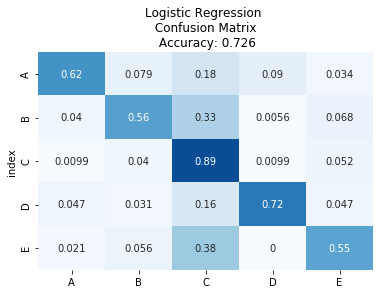

In [190]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, lr.predict(X_test_std))
print (conf_mat)

from sklearn.preprocessing import normalize

normed_conf = normalize(conf_mat, axis=1, norm='l1')
normed_conf = pd.DataFrame(normed_conf)
normed_conf.columns = ['A','B','C','D', 'E']
normed_conf['index']=['A','B','C','D', 'E']
normed_conf.set_index(['index'], inplace=True)
normed_conf

fig1 = sns.heatmap(normed_conf, cmap='Blues', annot=True, vmin=0.0, vmax=1.0, cbar=False)
fig1.set_title('Logistic Regression \n Confusion Matrix \n Accuracy: %.3f' % accuracy1)

In [191]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
accuracy2 = svm.score(X_test_std, y_test)

[[ 54   6  20   7   2]
 [  7 107  55   1   7]
 [  1  13 369   6  15]
 [  7   3  18  98   2]
 [  9  10  49   3  73]]


Text(0.5,1,'Support Vector Machine \n Confusion Matrix \n Accuracy: 0.744')

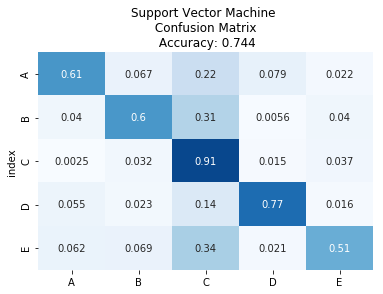

In [192]:
conf_mat = confusion_matrix(y_test, svm.predict(X_test_std))
print (conf_mat)

normed_conf = normalize(conf_mat, axis=1, norm='l1')
normed_conf = pd.DataFrame(normed_conf)
normed_conf.columns = ['A','B','C','D', 'E']
normed_conf['index']=['A','B','C','D', 'E']
normed_conf.set_index(['index'], inplace=True)
normed_conf

fig2 = sns.heatmap(normed_conf, cmap='Blues', annot=True, vmin=0.0, vmax=1.0, cbar=False)
fig2.set_title('Support Vector Machine \n Confusion Matrix \n Accuracy: %.3f' % accuracy2)

In [193]:
from sklearn.tree import DecisionTreeClassifier
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image  

tree = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=1)
tree.fit(X_train, y_train)
accuracy3 = tree.score(X_test, y_test)

[[ 44  10  29   5   1]
 [  6 101  67   1   2]
 [  7  21 363   3  10]
 [ 13   2  30  83   0]
 [  2  22  78   0  42]]


Text(0.5,1,'Decision Tree \n Confusion Matrix \n Accuracy: 0.672')

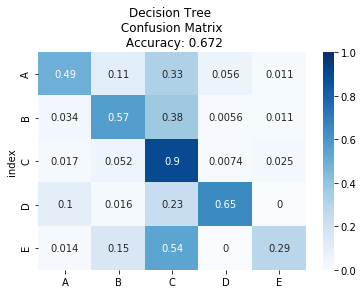

In [194]:
conf_mat = confusion_matrix(y_test, tree.predict(X_test))
print (conf_mat)

normed_conf = normalize(conf_mat, axis=1, norm='l1')
normed_conf = pd.DataFrame(normed_conf)
normed_conf.columns = ['A','B','C','D', 'E']
normed_conf['index']=['A','B','C','D', 'E']
normed_conf.set_index(['index'], inplace=True)
normed_conf

fig3 = sns.heatmap(normed_conf, cmap='Blues', annot=True, vmin=0.0, vmax=1.0)
fig3.set_title('Decision Tree \n Confusion Matrix \n Accuracy: %.3f' % accuracy3)

In [195]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Anaconda3\\Library\\bin\\graphviz'

In [196]:
dot_data = export_graphviz(tree, filled=True, rounded=True, 
                           class_names = ['A','B','C','D', 'E'],
                          feature_names =list(X_train.columns),
                          out_file=None)
graph =  graph_from_dot_data(dot_data)
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In the next cell, we take the 309 papers marked 'ERROR' and plot their combined predictions to a spreadsheet, which we feed back into the whole record collection to see if our guessed research group matches the address of the University listed.

In [197]:
X_new = data[data.group=='ERROR']
y = X_new.iloc[:,0]
X_new = X_new.iloc[:,11:]
X_new.fillna(0, inplace=True)
X_new_std = sc.transform(X_new)

predictions = pd.DataFrame({'alias': y, 'tree':tree.predict(X_new), 'svm': svm.predict(X_new_std), 'lr': lr.predict(X_new_std)})
predictions.to_csv('6-scientometrics101-predictions.csv')

We generate the histograms, and perform a t-test to see that the improvement in Stirling Diversity Indexes is statistically significant.

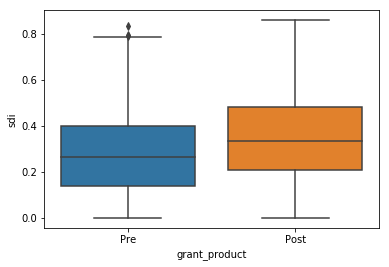

In [199]:
data2 = data[data.group != 'ERROR']
sns.boxplot(data=data2, x='grant_product', y='sdi',  order=['Pre', 'Post'])

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


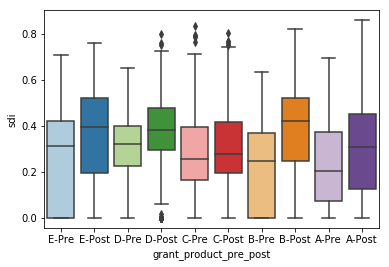

In [200]:
a = zip(data2['group'], data2['grant_product'])
b=list(a)
c = [item[0]+'-'+item[1] for item in b]
data2['grant_product_pre_post']=c
data2.sample(10)

boxplot_groups=list(data2.grant_product_pre_post.unique())
boxplot_groups.sort(reverse=True)

sns.boxplot(data=data2, x='grant_product_pre_post', y='sdi', 
            order=boxplot_groups, palette="Paired")

In [140]:
from scipy import stats
print('T-test : p-value : increase in st.dev')

stdev = np.std(data2.sdi)

increases = []

for letter in ['A', 'B', 'C', 'D', 'E']:
    pre = letter+'-Pre'
    post =  letter+'-Post'
    ttest = stats.ttest_ind(data.sdi[data.grant_product_pre_post==pre], 
                data.sdi[data.grant_product_pre_post==post]).pvalue
    increase = (data.sdi[data.grant_product_pre_post==post].mean()-data.sdi[data.grant_product_pre_post==pre].mean())/stdev
    increases.append(increase)
    print('Group '+letter+': %.5f : +%.5f' % (ttest, increase)) 
    
np.mean(increases)

T-test : p-value : increase in st.dev
Group A: 0.00833 : +0.33257
Group B: 0.00000 : +0.72993
Group C: 0.00879 : +0.15155
Group D: 0.00250 : +0.31565
Group E: 0.00030 : +0.38804


0.3835448845397206

If the following plots we chart SDI by year for each group, with the mean and interquartile range represented.  There's a more elegant way to do this, but never let e

Text(0.5,1,'Group A SDI by year')

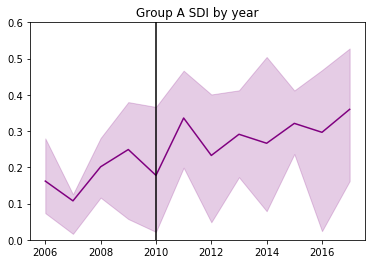

In [131]:
data2 = data[data.pub_year > 2005]

IQR25 = data2[data2.group=='A'].groupby('pub_year').sdi.quantile(.25)
IQR50 = data2[data2.group=='A'].groupby('pub_year').sdi.quantile(.50)
IQR75 = data2[data2.group=='A'].groupby('pub_year').sdi.quantile(.75)

plt.plot(IQR50, color='purple')
plt.ylim((0,.6))
plt.fill_between(IQR50.index, IQR25, IQR75, alpha=0.2, color='purple')
plt.axvline(2010, color = 'k')
plt.title('Group A SDI by year')

Text(0.5,1,'Group B SDI by year')

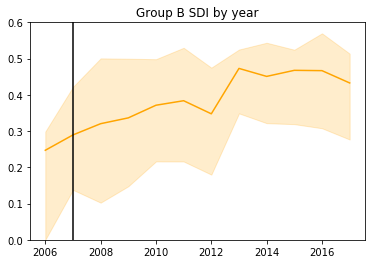

In [132]:
IQR25 = data2[data2.group=='B'].groupby('pub_year').sdi.quantile(.25)
IQR50 = data2[data2.group=='B'].groupby('pub_year').sdi.quantile(.50)
IQR75 = data2[data2.group=='B'].groupby('pub_year').sdi.quantile(.75)

plt.plot(IQR50, color='orange')
plt.fill_between(IQR50.index, IQR25, IQR75, alpha=0.2, color='orange')
plt.axvline(2007, color = 'k')
plt.ylim((0,.6))
plt.title('Group B SDI by year')

Text(0.5,1,'Group C SDI by year')

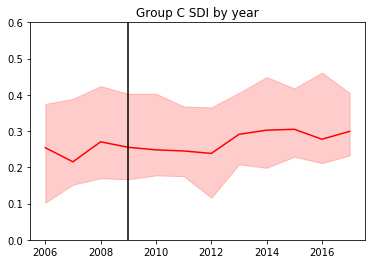

In [133]:
IQR25 = data2[data2.group=='C'].groupby('pub_year').sdi.quantile(.25)
IQR50 = data2[data2.group=='C'].groupby('pub_year').sdi.quantile(.50)
IQR75 = data2[data2.group=='C'].groupby('pub_year').sdi.quantile(.75)

plt.plot(IQR50, color='red')
plt.fill_between(IQR50.index, IQR25, IQR75, alpha=0.2, color='red')
plt.axvline(2009, color = 'k')
plt.ylim((0,.6))
plt.title('Group C SDI by year')

Text(0.5,1,'Group D SDI by year')

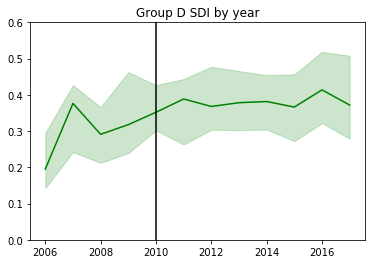

In [134]:
IQR25 = data2[data2.group=='D'].groupby('pub_year').sdi.quantile(.25)
IQR50 = data2[data2.group=='D'].groupby('pub_year').sdi.quantile(.50)
IQR75 = data2[data2.group=='D'].groupby('pub_year').sdi.quantile(.75)

plt.plot(IQR50, color='green')
plt.fill_between(IQR50.index, IQR25, IQR75, alpha=0.2, color='green')
plt.axvline(2010, color = 'k')
plt.ylim((0,.6))
plt.title('Group D SDI by year')

Text(0.5,1,'Group E SDI by year')

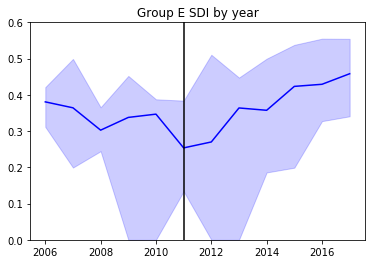

In [135]:
IQR25 = data2[data2.group=='E'].groupby('pub_year').sdi.quantile(.25)
IQR50 = data2[data2.group=='E'].groupby('pub_year').sdi.quantile(.50)
IQR75 = data2[data2.group=='E'].groupby('pub_year').sdi.quantile(.75)

plt.plot(IQR50, color='blue')
plt.fill_between(IQR50.index, IQR25, IQR75, alpha=0.2, color='blue')
plt.axvline(2011, color = 'k')
plt.ylim((0,.6))
plt.title('Group E SDI by year')